In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
Rank = pd.read_csv("Ranking.csv")
Total = pd.read_csv("Total Market Cap.csv")
Rank = Rank.sort_values(['year', 'market cap'], ascending = [True, False])
Rank = Rank.reset_index(drop=True)

In [3]:
Index = pd.DataFrame(columns = ['year', 'No'])
Index['year'] = np.arange(1970, 2023)
for i in range(0, 53):
    Index['No'][i] = len(Rank[Rank['year'] == Index['year'][i]])
    
Index

,year,No
0,1970,832
1,1971,810
2,1972,1388
3,1973,1414
4,1974,1299
5,1975,1273
6,1976,1301
7,1977,1294
8,1978,1273
9,1979,1268


In [4]:
SP500 = pd.DataFrame()
for i in range(1970, 2023):
    a = Rank[Rank['year'] == i][0:500]
    SP500 = SP500.append(a, ignore_index=True)
SP500

,year,PERMNO,COMNAM,market cap
0,1970,12490,INTERNATIONAL BUSINESS MACHS COR,3.383104e+07
1,1970,10401,AMERICAN TELEPHONE & TELEG CO,2.570674e+07
2,1970,12079,GENERAL MOTORS CORP,2.013636e+07
3,1970,11850,STANDARD OIL CO N J,1.380573e+07
4,1970,11754,EASTMAN KODAK CO,1.130142e+07
...,...,...,...,...
26495,2022,16338,VALVOLINE INC,5.795865e+06
26496,2022,13244,MATADOR RESOURCES CO,5.784155e+06
26497,2022,15073,FIRST TRUST E T F IV,5.782546e+06
26498,2022,17657,ISHARES TRUST,5.763460e+06


In [5]:
SP500_range = pd.DataFrame(columns = ['year', 'max', 'min', 'total'])
SP500_range['year'] = np.arange(1970, 2023)
for i in range(0, 53):
    SP500_range['max'][i] = np.max(SP500[SP500['year'] == SP500_range['year'][i]]['market cap'])
    SP500_range['min'][i] = np.min(SP500[SP500['year'] == SP500_range['year'][i]]['market cap'])
SP500_range['difference'] = SP500_range['max'] - SP500_range['min']
for i in range(0, 53):
    SP500_range['total'][i] = np.sum(SP500[SP500['year'] == SP500_range['year'][i]]['market cap'])
sub_Total = Total[Total['year'] >= 1970].reset_index(drop=True)
SP500_range['maxp'] = SP500_range['max'] / sub_Total['total']
SP500_range['minp'] = SP500_range['min'] / sub_Total['total']
SP500_range['percentage'] = SP500_range['total'] / sub_Total['total']
SP500_range['index level'] = SP500_range['total'] / SP500_range.iloc[0, 3] * 100
SP500_range

,year,max,min,total,difference,maxp,minp,percentage,index level
0,1970,33831041.083333,103058.607955,435701449.526042,33727982.475379,0.075079,0.000229,0.966925,100.0
1,1971,36719352.833333,122872.333333,519269740.568371,36596480.5,0.068596,0.00023,0.970061,119.180173
2,1972,44971653.75,141545.416667,602642610.352232,44830108.333333,0.070958,0.000223,0.950877,138.315494
3,1973,44319889.416667,114986.666667,593247568.050473,44204902.75,0.071727,0.000186,0.960103,136.159191
4,1974,29749205.604167,81031.739583,458095463.602273,29668173.864583,0.06256,0.00017,0.963333,105.139761
5,1975,30517916.65625,88263.375,499904096.335227,30429653.28125,0.059003,0.000171,0.966508,114.735468
6,1976,40090855.864583,119312.5,602360427.163542,39971543.364583,0.064274,0.000191,0.965707,138.250728
7,1977,39501406.104167,134878.666667,593378459.462135,39366527.4375,0.064024,0.000219,0.96175,136.189232
8,1978,39556580.0,145889.895833,594832776.853238,39410690.104167,0.063774,0.000235,0.959001,136.52302
9,1979,41732441.125,156241.833333,658391714.25529,41576199.291667,0.060936,0.000228,0.961354,151.110747


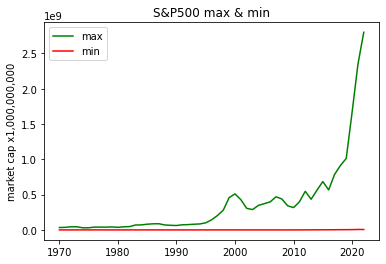

In [8]:
plt.plot(SP500_range['year'], SP500_range['max'], color='g', label='max')
plt.plot(SP500_range['year'], SP500_range['min'], color='r', label='min')
plt.legend()
plt.ylabel('market cap x1,000,000,000')
plt.title('S&P500 max & min')
plt.show()

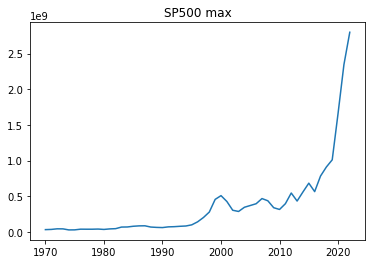

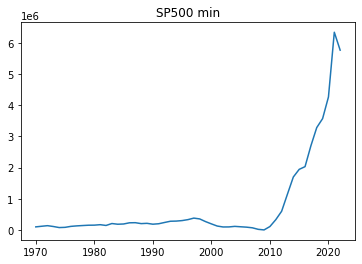

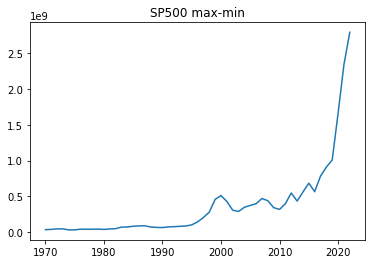

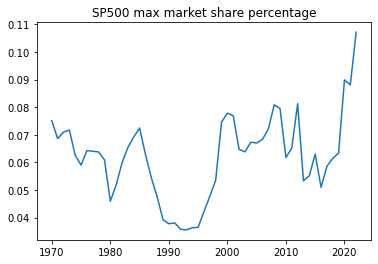

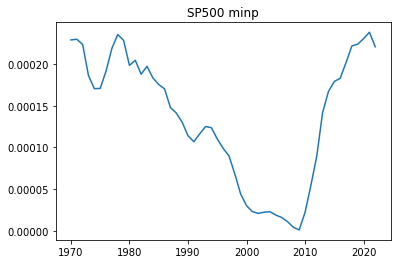

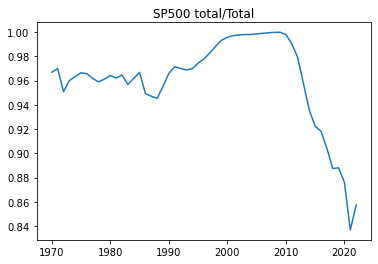

In [8]:
plt.plot(SP500_range['year'], SP500_range['max'])
plt.title('SP500 max')
plt.show()
plt.plot(SP500_range['year'], SP500_range['min'])
plt.title('SP500 min')
plt.show()
plt.plot(SP500_range['year'], SP500_range['difference'])
plt.title('SP500 max-min')
plt.show()
plt.plot(SP500_range['year'], SP500_range['maxp'])
plt.title('SP500 max market share percentage')
plt.show()
plt.plot(SP500_range['year'], SP500_range['minp'])
plt.title('SP500 minp')
plt.show()
plt.plot(SP500_range['year'], SP500_range['percentage'])
plt.title('SP500 total/Total')
plt.show()

In [9]:
SP400 = pd.DataFrame()
for i in range(1990, 2023):
    l = Index[Index['year'] == i].iloc[0, 1]
    if l <= 900:
        a = Rank[Rank['year'] == i][501:l+1]
        SP400 = SP400.append(a, ignore_index=True)
    else:
        a = Rank[Rank['year'] == i][501:901]
        SP400 = SP400.append(a, ignore_index=True)
SP400

,year,PERMNO,COMNAM,market cap
0,1990,10397,WERNER ENTERPRISES INC,1.863816e+05
1,1990,11617,TELEMUNDO GROUP INC,1.859213e+05
2,1990,12073,PEOPLES BANK BRIDGEPORT,1.836338e+05
3,1990,22664,U N R INDUSTRIES INC,1.836305e+05
4,1990,10299,LINEAR TECHNOLOGY CORP,1.822661e+05
...,...,...,...,...
10942,2022,13967,P T C THERAPEUTICS INC,2.672484e+06
10943,2022,20161,OASIS PETROLEUM INC,2.672447e+06
10944,2022,14079,SCHWAB STRATEGIC TRUST,2.669829e+06
10945,2022,22516,S I G N A SPORTS UNITED N V,2.669095e+06


In [10]:
SP400_range = pd.DataFrame(columns = ['year', 'No', 'max', 'min', 'total'])
SP400_range['year'] = np.arange(1990, 2023)

for i in range(0, 33):
    SP400_range['No'][i] = len(SP400[SP400['year'] == SP400_range['year'][i]])
    SP400_range['max'][i] = np.max(SP400[SP400['year'] == SP400_range['year'][i]]['market cap'])
    SP400_range['min'][i] = np.min(SP400[SP400['year'] == SP400_range['year'][i]]['market cap'])
SP400_range['difference'] = SP400_range['max'] - SP400_range['min']
for i in range(0, 33):
    SP400_range['total'][i] = np.sum(SP400[SP400['year'] == SP400_range['year'][i]]['market cap'])
sub_Total = Total[Total['year'] >= 1990].reset_index(drop=True)
SP400_range['maxp'] = SP400_range['max'] / sub_Total['total']
SP400_range['minp'] = SP400_range['min'] / sub_Total['total']
SP400_range['percentage'] = SP400_range['total'] / sub_Total['total']
SP400_range['index level'] = SP400_range['total'] / SP400_range.iloc[0, 4] * 100
SP400_range

,year,No,max,min,total,difference,maxp,minp,percentage,index level
0,1990,400,186381.635417,45743.28125,36738871.352113,140638.354167,0.000112,0.000028,0.022173,100.0
1,1991,400,203290.84375,44640.5625,38129223.710251,158650.28125,0.000107,0.000023,0.02003,103.784418
2,1992,400,236718.854167,51453.841146,45513656.136396,185265.013021,0.000113,0.000025,0.021677,123.884198
3,1993,400,281285.791667,59859.052083,51973983.904938,221426.739583,0.000124,0.000026,0.022932,141.468646
4,1994,400,286115.979167,60512.369792,52725322.042839,225603.609375,0.000123,0.000026,0.022613,143.513723
5,1995,400,302917.572917,58826.59375,55874514.431958,244090.979167,0.00011,0.000021,0.020212,152.08555
6,1996,400,333307.041667,59609.708333,61845851.450449,273697.333333,0.000098,0.000018,0.018254,168.339008
7,1997,400,376103.223958,53395.447917,63078030.263961,322707.776042,0.000088,0.000013,0.014781,171.692891
8,1998,400,355178.192708,41150.833333,55040994.129162,314027.359375,0.000068,0.000008,0.010522,149.81678
9,1999,400,267532.90625,22982.75,38271538.249306,244550.15625,0.000044,0.000004,0.006235,104.171785


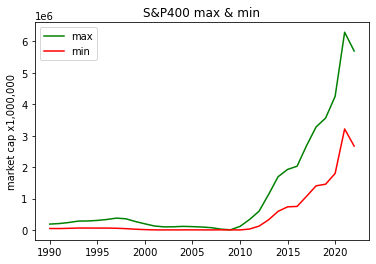

In [14]:
plt.plot(SP400_range['year'], SP400_range['max'], color='g', label='max')
plt.plot(SP400_range['year'], SP400_range['min'], color='r', label='min')
plt.legend()
plt.ylabel('market cap x1,000,000')
plt.title('S&P400 max & min')
plt.show()

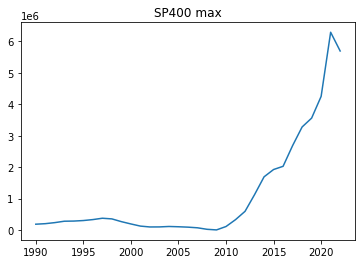

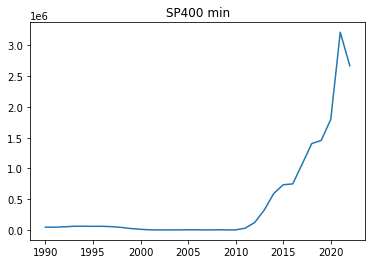

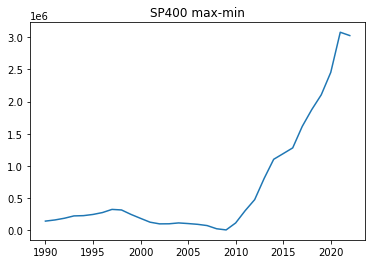

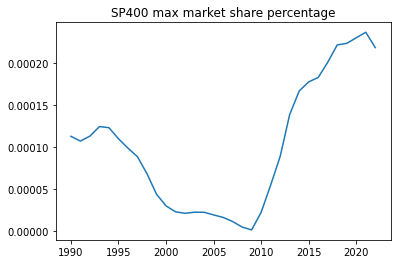

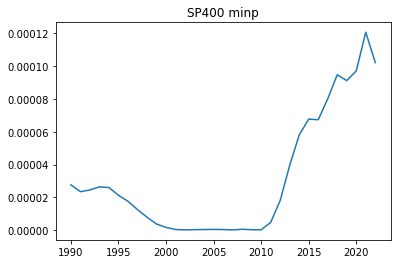

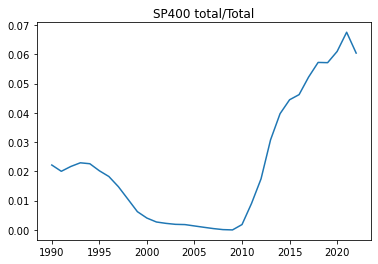

In [11]:
plt.plot(SP400_range['year'], SP400_range['max'])
plt.title('SP400 max')
plt.show()
plt.plot(SP400_range['year'], SP400_range['min'])
plt.title('SP400 min')
plt.show()
plt.plot(SP400_range['year'], SP400_range['difference'])
plt.title('SP400 max-min')
plt.show()
plt.plot(SP400_range['year'], SP400_range['maxp'])
plt.title('SP400 max market share percentage')
plt.show()
plt.plot(SP400_range['year'], SP400_range['minp'])
plt.title('SP400 minp')
plt.show()
plt.plot(SP400_range['year'], SP400_range['percentage'])
plt.title('SP400 total/Total')
plt.show()

In [15]:
SP600 = pd.DataFrame()
for i in range(1994, 2023):
    l = Index[Index['year'] == i].iloc[0, 1]
    if l <= 900:
        a = pd.DataFrame(columns = ['year', 'PERMNO', 'COMNAM', 'market cap'])
        a['year'] = np.array([i])
        SP600 = SP600.append(a, ignore_index=True)
    elif (l > 900) & (l <= 1500):
        a = Rank[Rank['year'] == i][901:l+1]
        SP600 = SP600.append(a, ignore_index=True)
    else:
        a = Rank[Rank['year'] == i][901:1501]
        SP600 = SP600.append(a, ignore_index=True)
SP600

,year,PERMNO,COMNAM,market cap
0,1994,11225,FIRSTFEDERAL FINANCIAL SVCS CORP,6.037210e+04
1,1994,11991,CHARTER FSB BANCORP INC,6.025221e+04
2,1994,10011,A T C ENVIRONMENTAL INC,6.009880e+04
3,1994,11397,WASHINGTON TRUST BANCORP INC,5.999066e+04
4,1994,11318,BANDO MCGLOCKLIN CAP CORP,5.986075e+04
...,...,...,...,...
9550,2022,21361,HAGERTY INC,1.100064e+06
9551,2022,13943,TRISTATE CAPITAL HOLDINGS INC,1.097203e+06
9552,2022,17395,AMPLIFY ETF TRUST,1.096208e+06
9553,2022,22182,ALGOMA STEEL GROUP INC,1.095710e+06


In [16]:
SP600_range = pd.DataFrame(columns = ['year', 'No', 'max', 'min', 'total', 'large/small min-max'])
SP600_range['year'] = np.arange(1994, 2023)

for i in range(0, 29):
    SP600_range['No'][i] = len(SP600[SP600['year'] == SP600_range['year'][i]])
    SP600_range['max'][i] = np.max(SP600[SP600['year'] == SP600_range['year'][i]]['market cap'])
    SP600_range['min'][i] = np.min(SP600[SP600['year'] == SP600_range['year'][i]]['market cap'])
SP600_range['max-min'] = SP600_range['max'] - SP600_range['min']
for i in range(0, 29):
    SP600_range['total'][i] = np.sum(SP600[SP600['year'] == SP600_range['year'][i]]['market cap'])
sub_Total = Total[Total['year'] >= 1994].reset_index(drop=True)
SP600_range['maxp'] = SP600_range['max'] / sub_Total['total']
SP600_range['minp'] = SP600_range['min'] / sub_Total['total']
for i in range(0, 29):
    year = SP600_range['year'][i]
    sub = SP500_range[SP500_range['year'] == year]
    SP600_range['large/small min-max'][i] = sub.iloc[0, 2] - SP600_range.iloc[i, 2]
SP600_range['percentage'] = SP600_range['total'] / sub_Total['total']
SP600_range['index level'] = SP600_range['total'] / SP600_range.iloc[0, 4] * 100
SP600_range

,year,No,max,min,total,large/small min-max,max-min,maxp,minp,percentage,index level
0,1994,600,60372.104167,7170.041667,16590031.591242,228058.322917,53202.0625,0.000026,0.000003,0.007115,100.0
1,1995,600,58600.479167,2610.596591,14445842.110079,246119.315104,55989.882576,0.000021,0.000001,0.005226,87.075435
2,1996,516,59380.229167,984.563093,12355006.02719,276193.755208,58395.666073,0.000018,0.0,0.003647,74.472468
3,1997,411,53241.973958,559.204545,9521492.915677,330849.526042,52682.769413,0.000012,0.0,0.002231,57.392856
4,1998,295,40915.125,793.03172,5240578.952417,317044.695312,40122.09328,0.000008,0.0,0.001002,31.588722
5,1999,173,22835.210938,930.447332,1893950.0596,249315.101562,21904.763606,0.000004,0.0,0.000309,11.416193
6,2000,67,10517.632812,2065.625,442183.233586,188669.398438,8452.007812,0.000002,0.0,0.000067,2.665355
7,2001,1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0
8,2002,1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0
9,2003,1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0


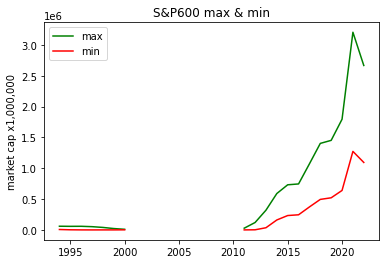

In [18]:
plt.plot(SP600_range['year'], SP600_range['max'], color='g', label='max')
plt.plot(SP600_range['year'], SP600_range['min'], color='r', label='min')
plt.legend()
plt.ylabel('market cap x1,000,000')
plt.title('S&P600 max & min')
plt.show()

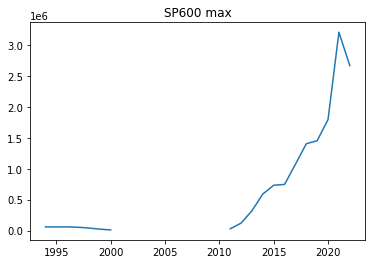

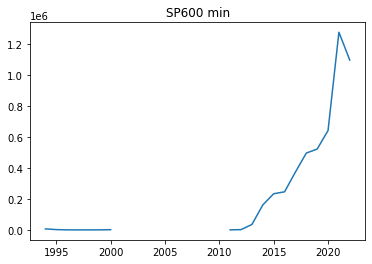

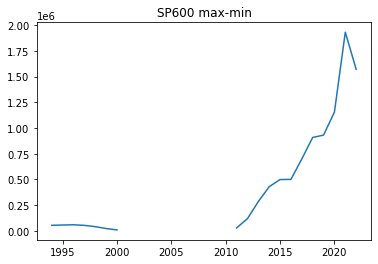

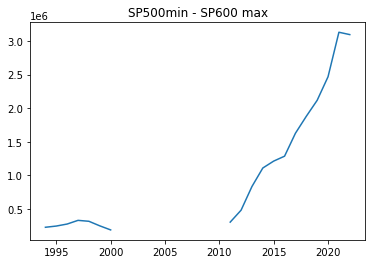

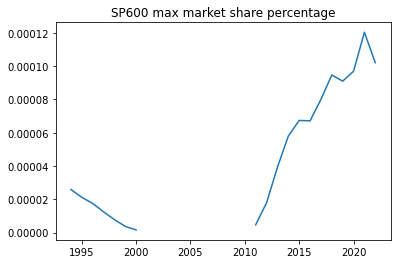

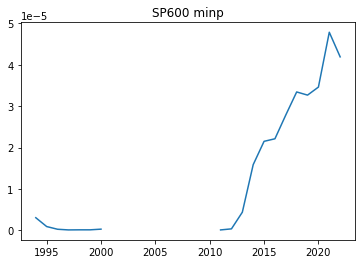

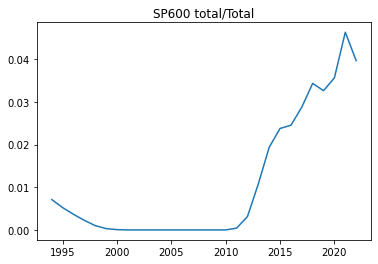

In [20]:
plt.plot(SP600_range['year'], SP600_range['max'])
plt.title('SP600 max')
plt.show()
plt.plot(SP600_range['year'], SP600_range['min'])
plt.title('SP600 min')
plt.show()
plt.plot(SP600_range['year'], SP600_range['max-min'])
plt.title('SP600 max-min')
plt.show()
plt.plot(SP600_range['year'], SP600_range['large/small min-max'])
plt.title('SP500min - SP600 max')
plt.show()
plt.plot(SP600_range['year'], SP600_range['maxp'])
plt.title('SP600 max market share percentage')
plt.show()
plt.plot(SP600_range['year'], SP600_range['minp'])
plt.title('SP600 minp')
plt.show()
plt.plot(SP600_range['year'], SP600_range['percentage'])
plt.title('SP600 total/Total')
plt.show()

In [15]:
cross_comparison = pd.DataFrame(columns = ['year', '500/400', '400/600'])
cross_comparison['year'] = np.arange(1990, 2023)
for i in range(0, 33):
    year = SP400_range['year'][i]
    sub = SP500_range[SP500_range['year'] == year]
    cross_comparison['500/400'][i] = sub.iloc[0, 2] / SP400_range.iloc[i, 3]
for i in range(0, 29):
    year = SP600_range['year'][i]
    sub = SP400_range[SP400_range['year'] == year]
    cross_comparison['400/600'][i+4] = sub.iloc[0, 3] / SP600_range.iloc[i, 3]

In [16]:
cross_comparison

,year,500/400,400/600
0,1990,4.132422,NaN
1,1991,4.557623,NaN
2,1992,4.744925,NaN
3,1993,4.734799,NaN
4,1994,4.766471,8.439612
5,1995,5.179967,22.533774
6,1996,5.629519,60.544325
7,1997,7.193338,95.484646
8,1998,8.698726,51.890526
9,1999,11.841503,24.700753


In [17]:
# SP600.to_csv('SP600.csv',index=False)
# SP500.to_csv('SP500.csv',index=False)
# SP400.to_csv('SP400.csv',index=False)

In [18]:
# SP500_range.to_csv('SP500_range.csv',index=False)
# SP400_range.to_csv('SP400_range.csv',index=False)
# SP600_range.to_csv('SP600_range.csv',index=False)